In [1]:
#importar las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from datetime import datetime 
import seaborn as seb

In [2]:
#importar datos txt y leerlos con .read_csv
df0 = pd.read_csv('datos/26022.txt', skiprows=19,skipfooter=1, sep='\s+',engine='python')

In [3]:
#Convertir nuestros datos a columnas para poder trabajar
df0.columns=['Fecha','Precip','Evap','Tmax','Tmin']
cols=['Precip','Evap','Tmax','Tmin']
#Errors=Coerce lo que no pueda procesar como fecha (especificado) no lo va a procesar(ignorar)
df0[cols]= df0[cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [4]:
df0.head()

,Fecha,Precip,Evap,Tmax,Tmin
0,01/09/1964,0.0,5.1,40.0,21.0
1,02/09/1964,0.0,6.0,41.5,18.0
2,03/09/1964,35.0,9.1,41.5,19.5
3,04/09/1964,0.0,8.6,41.0,19.5
4,05/09/1964,0.0,2.2,42.5,18.0


In [5]:
df0['Fecha']=pd.to_datetime(df0['Fecha'],dayfirst=True,format= '%d/%m/%Y',errors='coerce')

In [6]:
df0.dtypes

Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
dtype: object

In [7]:
len(df0['Tmax'])

15359

In [8]:
df0.dtypes

Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
dtype: object

In [9]:
#debemos quitar los NaN de los datos que queremos graficar
#df1= df0[pd.notnull(df0['Tmax'])]
#df1=df0.dropna()
#df1.head()

In [10]:
#len(df1['Tmax'])

In [11]:
#Crear un nuevo DataFrame para poder reducir el intervalo de datos, al que solo nos interesa
df1=df0.loc[(df0['Fecha']>"1971-01-01") & (df0['Fecha']<"2000-12-31")]
df1.head()

,Fecha,Precip,Evap,Tmax,Tmin
2314,1971-01-02,0.0,3.6,24.0,7.0
2315,1971-01-03,0.0,4.6,20.0,8.0
2316,1971-01-04,0.0,3.2,12.0,-4.5
2317,1971-01-05,0.0,3.3,6.5,-8.0
2318,1971-01-06,0.0,3.4,7.0,-9.0


In [12]:
len(df1['Tmax'])

9295

In [13]:
#debemos quitar los NaN de los datos que queremos graficar
df2= df1[pd.notnull(df1['Tmax'])]
#el comando notnull nos permite solo tomar en cuenta los datos que sí son datos y no son nulos.
#df1=df0.dropna()
#df1.head()

In [14]:
len(df2['Tmax'])

9278

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


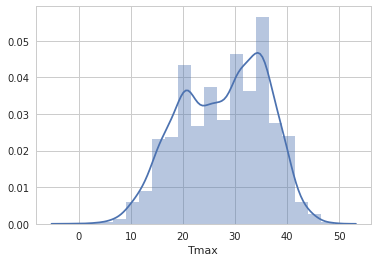

In [15]:
#realizar un histograma de la frecuencia de la Tmax.
seb.set(style="whitegrid")
x=df2['Tmax'] 
seb.distplot(x,bins=20)
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"


In [16]:
df2.describe()

,Precip,Evap,Tmax,Tmin
count,9276.000000,6171.000000,9278.000000,9272.000000
mean,0.965319,6.497504,27.705669,9.033553
std,4.324622,3.453216,8.246022,7.832651
min,0.000000,0.100000,-1.000000,-16.000000
25%,0.000000,3.600000,21.000000,3.000000
50%,0.000000,6.300000,28.500000,8.000000
75%,0.000000,9.000000,34.500000,16.000000
max,101.000000,18.000000,49.000000,27.000000


In [17]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Precip,9276.0,0.965319,4.324622,0.0,0.0,0.0,0.0,101.0
Evap,6171.0,6.497504,3.453216,0.1,3.6,6.3,9.0,18.0
Tmax,9278.0,27.705669,8.246022,-1.0,21.0,28.5,34.5,49.0
Tmin,9272.0,9.033553,7.832651,-16.0,3.0,8.0,16.0,27.0


In [18]:
#Extraer el Mes del Df2
df2month = df2['Fecha'].dt.month
#intentar usar este
#df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month

In [19]:
df2month.tail()

11604    12
11605    12
11606    12
11607    12
11608    12
Name: Fecha, dtype: int64

In [20]:
#Convertimos el mes en variable temporal para poder realizar el BoxPlot
# Convertir la cadena de caracteres 'DateTime' en variable temporal 'NDateTime'
df2['Ndt'] = pd.to_datetime(df2['Fecha'],format='%d/%m/%Y')
df2['month'] = df2['Ndt'].dt.month

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/edyhndz7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


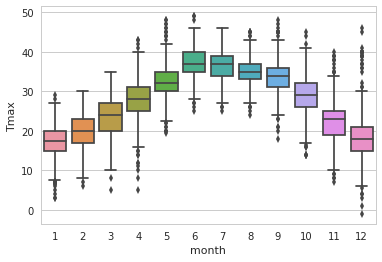

In [21]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df2)
mpl.show()

In [22]:
#Crear un nuevo DataFrame para poder reducir el intervalo de datos, al que solo nos interesa
df3=df0.loc[(df0['Fecha']>"2001-01-01") & (df0['Fecha']<"2005-12-31")]
df3.head()

,Fecha,Precip,Evap,Tmax,Tmin
11611,2001-01-02,0.0,NaN,29.0,-2.0
11612,2001-01-03,0.0,NaN,24.0,3.0
11613,2001-01-04,0.0,NaN,28.0,-2.0
11614,2001-01-05,21.0,NaN,27.0,-3.0
11615,2001-01-06,0.0,NaN,27.0,-2.0


In [23]:
len(df3['Tmax'])

1715

In [24]:
#debemos quitar los NaN de los datos que queremos graficar
df4= df3[pd.notnull(df3['Tmax'])]
#df1=df0.dropna()
#df1.head()

In [25]:
len(df4['Tmax'])

1684

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


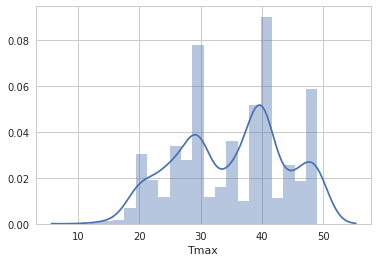

In [26]:
#realizar un histograma de la frecuencia de la Tmax.
seb.set(style="whitegrid")
x=df4['Tmax'] 
seb.distplot(x,bins=20)
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"

In [27]:
df4.describe()

,Precip,Evap,Tmax,Tmin
count,1684.000000,0.0,1684.000000,1658.000000
mean,0.767518,NaN,35.049287,10.151990
std,4.174608,NaN,8.736569,8.215478
min,0.000000,NaN,12.000000,-8.000000
25%,0.000000,NaN,29.000000,4.000000
50%,0.000000,NaN,36.000000,10.000000
75%,0.000000,NaN,41.000000,18.000000
max,68.000000,NaN,49.000000,36.000000


In [28]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Precip,1684.0,0.767518,4.174608,0.0,0.0,0.0,0.0,68.0
Evap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tmax,1684.0,35.049287,8.736569,12.0,29.0,36.0,41.0,49.0
Tmin,1658.0,10.151990,8.215478,-8.0,4.0,10.0,18.0,36.0


In [29]:
#Extraer el Mes del Df2
df4month = df4['Fecha'].dt.month
#intentar usar este
#df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month

In [30]:
df4month.tail()

13321    12
13322    12
13323    12
13324    12
13325    12
Name: Fecha, dtype: int64

In [31]:
#Convertimos el mes en variable temporal para poder realizar el BoxPlot
# Convertir la cadena de caracteres 'DateTime' en variable temporal 'NDateTime'
df4['Ndt'] = pd.to_datetime(df4['Fecha'],format='%d/%m/%Y')
df4['month'] = df4['Ndt'].dt.month

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/edyhndz7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


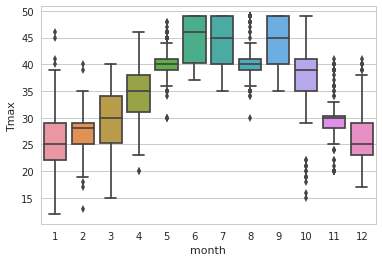

In [32]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df4)
mpl.show()

In [33]:
#Crear un intervalo por lustro a partir del 2000
#Crear un nuevo DataFrame para poder reducir el intervalo de datos, al que solo nos interesa
df5=df0.loc[(df0['Fecha']>"2006-01-01") & (df0['Fecha']<"2011-12-31")]
df5.head()

,Fecha,Precip,Evap,Tmax,Tmin
13328,2006-01-02,0.0,NaN,39.0,12.0
13329,2006-01-03,0.0,NaN,38.0,19.0
13330,2006-01-04,0.0,NaN,40.0,17.0
13331,2006-01-05,0.0,NaN,38.0,21.0
13332,2006-01-06,0.0,NaN,39.0,20.0


In [34]:
len(df5['Tmax'])

2031

In [35]:
#debemos quitar los NaN de los datos que queremos graficar
df6= df5[pd.notnull(df5['Tmax'])]
#df1=df0.dropna()
#df1.head()

In [36]:
len(df6['Tmax'])

2015

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


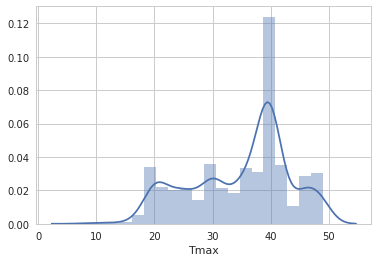

In [37]:
#realizar un histograma de la frecuencia de la Tmax.
seb.set(style="whitegrid")
x=df6['Tmax'] 
seb.distplot(x,bins=20)
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"

In [38]:
df6.describe()

,Precip,Evap,Tmax,Tmin
count,2014.000000,0.0,2015.00000,2005.000000
mean,0.743545,NaN,34.80794,9.236908
std,3.779523,NaN,8.51445,6.402597
min,0.000000,NaN,8.00000,-12.000000
25%,0.000000,NaN,29.00000,5.000000
50%,0.000000,NaN,38.00000,8.000000
75%,0.000000,NaN,40.00000,12.000000
max,50.000000,NaN,49.00000,31.000000


In [39]:
df6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Precip,2014.0,0.743545,3.779523,0.0,0.0,0.0,0.0,50.0
Evap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tmax,2015.0,34.807940,8.514450,8.0,29.0,38.0,40.0,49.0
Tmin,2005.0,9.236908,6.402597,-12.0,5.0,8.0,12.0,31.0


In [40]:
#Extraer el Mes del Df2
df6month = df6['Fecha'].dt.month
#intentar usar este
#df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month

In [41]:
df6month.tail()

15351    7
15352    7
15353    7
15354    7
15358    7
Name: Fecha, dtype: int64

In [42]:
#Convertimos el mes en variable temporal para poder realizar el BoxPlot
# Convertir la cadena de caracteres 'DateTime' en variable temporal 'NDateTime'
df6['Ndt'] = pd.to_datetime(df6['Fecha'],format='%d/%m/%Y')
df6['month'] = df6['Ndt'].dt.month

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/edyhndz7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


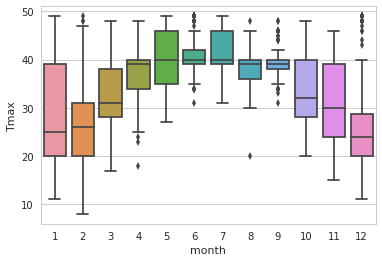

In [43]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df6)
mpl.show()

In [44]:
#Pondremos el análisis de los bloxplot de referencia y seguidos los análisis por lustro [2000-2011]

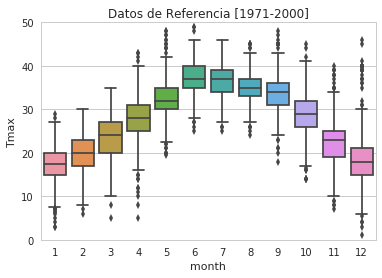

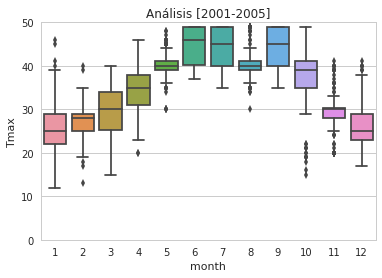

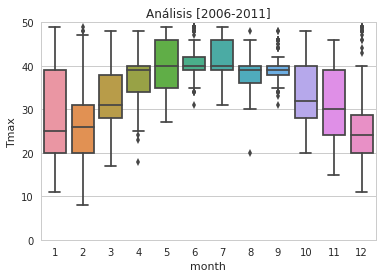

In [45]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
#Boxplot de referencia [1970-2000]
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df2)
ax.set_title('Datos de Referencia [1971-2000]')
ax.set_ylim([0, 50])  
mpl.show()
#Bloxplot [2000-2005]
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df4)
ax.set_title('Análisis [2001-2005]')
ax.set_ylim([0, 50])
mpl.show()
#Boxplot [2006-2011]
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df6)
ax.set_title('Análisis [2006-2011]')
ax.set_ylim([0, 50])  
mpl.show()

In [46]:
#en seguida se muestra un analisas de las temperaturas más calientes de cada mes.

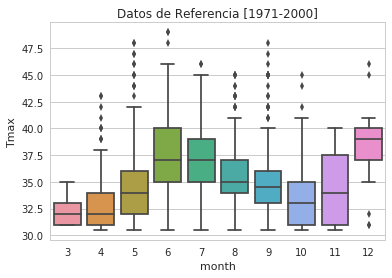

In [47]:
df7=df2.loc[(df2['month']==1)]
df7=df2.loc[(df2['Tmax']>30)]
df7.head()
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df7)
ax.set_title('Datos de Referencia [1971-2000]')
mpl.show()

In [48]:
df7.tail()

,Fecha,Precip,Evap,Tmax,Tmin,Ndt,month
11600,2000-12-22,0.0,NaN,40.0,-2.0,2000-12-22,12
11601,2000-12-23,0.0,NaN,39.0,4.0,2000-12-23,12
11602,2000-12-24,0.0,NaN,39.0,3.0,2000-12-24,12
11603,2000-12-25,0.0,NaN,40.0,2.0,2000-12-25,12
11604,2000-12-26,0.0,NaN,40.0,6.0,2000-12-26,12


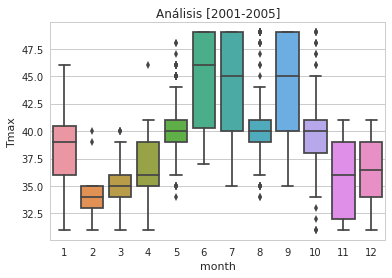

In [49]:
df8=df4.loc[(df4['month']==1)]
df8=df4.loc[(df4['Tmax']>30)]
df8.head()
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df8)
ax.set_title('Análisis [2001-2005]')
mpl.show()

In [50]:
df8.tail()

,Fecha,Precip,Evap,Tmax,Tmin,Ndt,month
13321,2005-12-26,0.0,NaN,39.0,20.0,2005-12-26,12
13322,2005-12-27,0.0,NaN,40.0,10.0,2005-12-27,12
13323,2005-12-28,0.0,NaN,41.0,16.0,2005-12-28,12
13324,2005-12-29,0.0,NaN,40.0,19.0,2005-12-29,12
13325,2005-12-30,0.0,NaN,40.0,17.0,2005-12-30,12


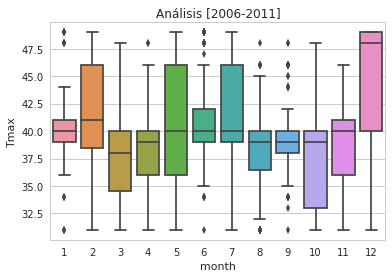

In [51]:
df9=df6.loc[(df6['month']==1)]
df9=df6.loc[(df6['Tmax']>30)]
df9.head()
seb.set(style="whitegrid")
ax = seb.boxplot(x="month", y="Tmax", data=df9)
ax.set_title('Análisis [2006-2011]')
mpl.show()

In [52]:
df9.tail()

,Fecha,Precip,Evap,Tmax,Tmin,Ndt,month
15351,2011-07-24,0.0,NaN,38.0,17.0,2011-07-24,7
15352,2011-07-25,25.0,NaN,38.0,17.0,2011-07-25,7
15353,2011-07-26,0.0,NaN,35.0,17.0,2011-07-26,7
15354,2011-07-27,0.0,NaN,38.0,17.0,2011-07-27,7
15358,2011-07-31,15.0,NaN,40.0,NaN,2011-07-31,7


In [53]:
#En seguida se muestra la distribución normalizada de comparación.

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


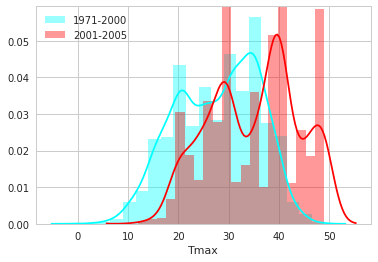

In [54]:
#realizar un histograma de la frecuencia de la Tmax.
from scipy import stats
seb.set(style="whitegrid")
x=df2['Tmax'] 
seb.distplot(x,bins=20,kde=True,label="1971-2000",color='cyan')
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"
#realizar un histograma de la frecuencia de la Tmax.
seb.set(style="whitegrid")
x=df4['Tmax'] 
seb.distplot(x,bins=20,kde=True,label="2001-2005",color='red')
mpl.legend()
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"

/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/edyhndz7/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


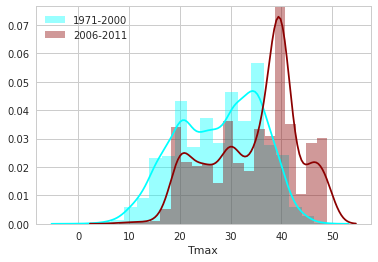

In [55]:

#realizar un histograma de la frecuencia de la Tmax.
seb.set(style="whitegrid")
x=df2['Tmax'] 
seb.distplot(x,bins=20,kde=True,label="1971-2000",color='cyan')
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"
#realizar un histograma de la frecuencia de la Tmax.
seb.set(style="whitegrid")
x=df6['Tmax'] 
seb.distplot(x,bins=20,kde=True,label="2006-2011",color='darkred')
mpl.legend()
#xlabel(Tmax)
#Ylabel(freuencia)
#Título "histograma"

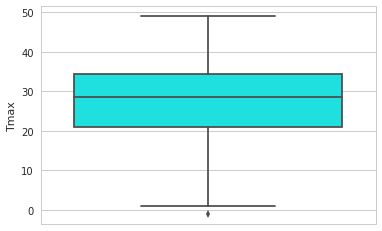

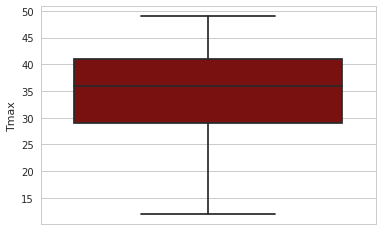

In [56]:
seb.set(style="whitegrid")
ax1 = seb.boxplot( y="Tmax",data=df2,color='cyan',dodge=False)
mpl.show()
seb.set(style="whitegrid")
ax2= seb.boxplot( y="Tmax", data=df4, color='darkred',dodge=False)
order=["ax1","ax2"]
mpl.show()


In [57]:
df10=df0
df10.loc[df10['Fecha'].between("1971-01-01","2000-12-31"),"ref"]=("ref0")
df10.loc[df10['Fecha'].between("2001-01-01","2006-12-31"),"ref"]=("ref1")
df10.loc[df10['Fecha'].between("2007-01-01","2011-12-31"),"ref"]=("ref2")
df10.head()

,Fecha,Precip,Evap,Tmax,Tmin,ref
0,1964-09-01,0.0,5.1,40.0,21.0,NaN
1,1964-09-02,0.0,6.0,41.5,18.0,NaN
2,1964-09-03,35.0,9.1,41.5,19.5,NaN
3,1964-09-04,0.0,8.6,41.0,19.5,NaN
4,1964-09-05,0.0,2.2,42.5,18.0,NaN


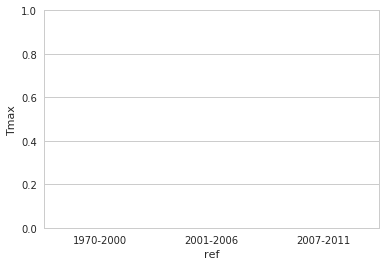

In [62]:
 ax = seb.boxplot(x="ref", y="Tmax", data=df10,order=["1970-2000", "2001-2006","2007-2011"])